In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')


In [7]:

trader_df['Trade Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['Sentiment Date'] = pd.to_datetime(sentiment_df['date']).dt.date


merged_df = pd.merge(trader_df, sentiment_df, left_on='Trade Date', right_on='Sentiment Date', how='left')


C:\Users\Fathima S\AppData\Local\Temp\ipykernel_21400\3726006986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='viridis')


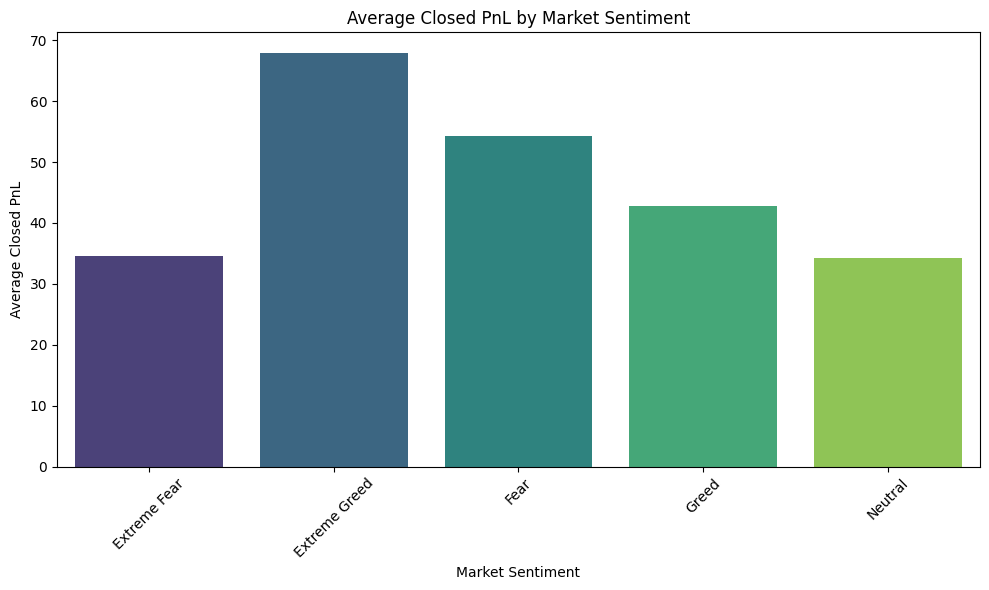

In [8]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_pnl, x='classification', y='Closed PnL', palette='viridis')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Fathima S\AppData\Local\Temp\ipykernel_21400\989292037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='coolwarm')


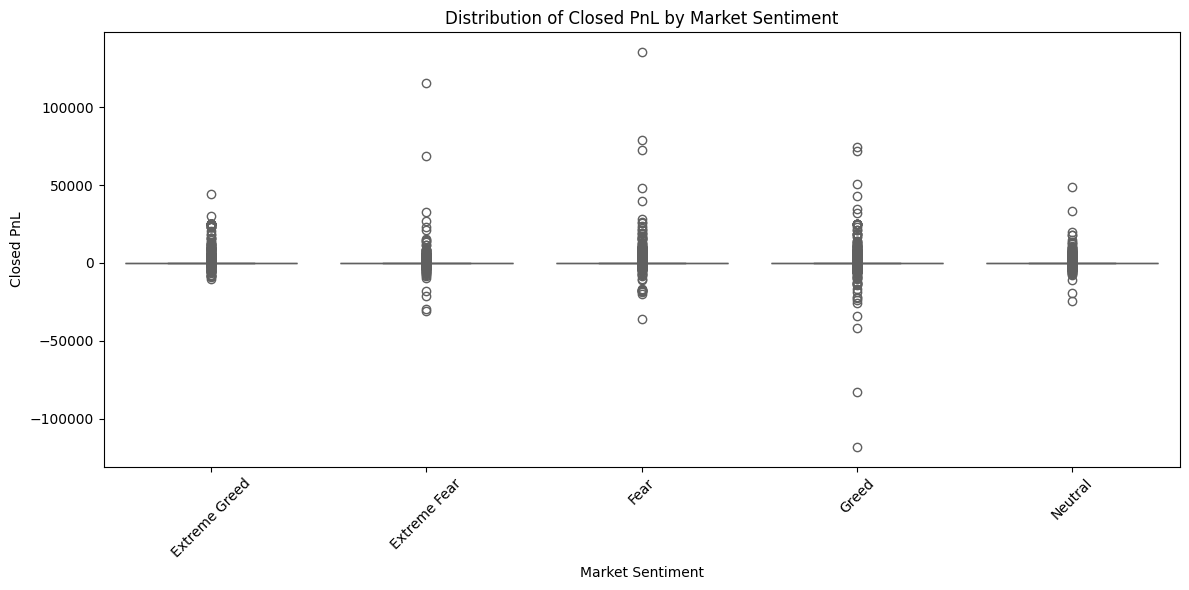

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='coolwarm')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
top_traders = (
    merged_df.groupby(['classification', 'Account'])['Closed PnL']
    .sum()
    .reset_index()
    .sort_values(['classification', 'Closed PnL'], ascending=[True, False])
)

top_5_each = top_traders.groupby('classification').head(5)
top_5_each


,classification,Account,Closed PnL
29,Extreme Fear,0xbaaaf6571ab7d571043ff1e313a9609a10637864,2.619180e+05
16,Extreme Fear,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1.989006e+05
11,Extreme Fear,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,1.666964e+05
0,Extreme Fear,0x083384f897ee0f19899168e3b1bec365f52a9012,1.247692e+05
12,Extreme Fear,0x4f93fead39b70a1824f981a54d4e55b278e9f760,7.434655e+04
59,Extreme Greed,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,1.105305e+06
61,Extreme Greed,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,4.788115e+05
49,Extreme Greed,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,2.107269e+05
44,Extreme Greed,0x4f93fead39b70a1824f981a54d4e55b278e9f760,1.292177e+05
41,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,1.242849e+05
